In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-revenue-prediction/train.csv.zip
/kaggle/input/restaurant-revenue-prediction/sampleSubmission.csv
/kaggle/input/restaurant-revenue-prediction/test.csv.zip


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
import pandas as pd
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df_train = pd.read_csv("/kaggle/input/restaurant-revenue-prediction/train.csv.zip")
df_test =  pd.read_csv("/kaggle/input/restaurant-revenue-prediction/test.csv.zip")

/kaggle/input/restaurant-revenue-prediction/train.csv.zip
/kaggle/input/restaurant-revenue-prediction/sampleSubmission.csv
/kaggle/input/restaurant-revenue-prediction/test.csv.zip


In [3]:
df_train = pd.read_csv("/kaggle/input/restaurant-revenue-prediction/train.csv.zip")
#to display first 5 rows
df_train.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
#display basic structure of train data
df_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [5]:
#Total no of rows and columns
df_train.shape

(137, 43)

In [6]:
#Displaying Column names
df_train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [7]:
df_train.info

<bound method DataFrame.info of       Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...

In [8]:
#Checking the data type
df_train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [9]:
#Structure of testing data
df_test.shape

(100000, 42)

In [10]:
#Rows containing duplicate data
duplicate_rows_df_train = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_train.shape)

number of duplicate rows:  (0, 43)


In [11]:
#count no of rows 
df_train.count()

Id            137
Open Date     137
City          137
City Group    137
Type          137
P1            137
P2            137
P3            137
P4            137
P5            137
P6            137
P7            137
P8            137
P9            137
P10           137
P11           137
P12           137
P13           137
P14           137
P15           137
P16           137
P17           137
P18           137
P19           137
P20           137
P21           137
P22           137
P23           137
P24           137
P25           137
P26           137
P27           137
P28           137
P29           137
P30           137
P31           137
P32           137
P33           137
P34           137
P35           137
P36           137
P37           137
revenue       137
dtype: int64

In [12]:
df_train_columns = [col for col in df_train.columns if col not in ["Id", "Open Date"]]


In [13]:
df_train_columns

['City',
 'City Group',
 'Type',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

In [14]:
#numerical columns
num_col=df_train.select_dtypes(exclude=['object']).columns
num_col

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [15]:
#categorical columns
cat_col=df_train.select_dtypes(include=['object']).columns
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [16]:
#getting null values if any
df_train.columns[df_train.isna().any()].tolist()

[]

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

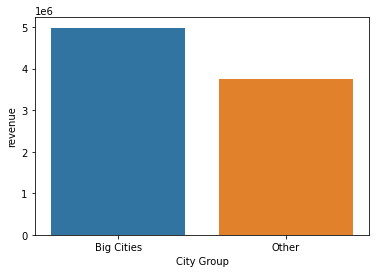

In [17]:
cityPerc=df_train[["City Group","revenue"]].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group', y='revenue',data=cityPerc)

<AxesSubplot:xlabel='City', ylabel='revenue'>

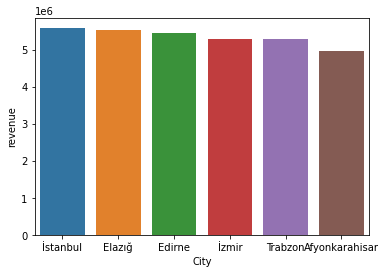

In [18]:
cityPerc=df_train[["City","revenue"]].groupby(['City'],as_index=False).mean()
newDF=cityPerc.sort_values(["revenue"],ascending=False)
sns.barplot(x='City', y='revenue',data=newDF.head(6))

<AxesSubplot:xlabel='City', ylabel='revenue'>

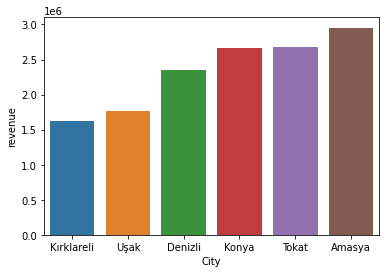

In [19]:
cityPerc=df_train[["City","revenue"]].groupby(['City'],as_index=False).mean()
newDF=cityPerc.sort_values(["revenue"],ascending=True)
sns.barplot(x='City', y='revenue',data=newDF.head(6))

<AxesSubplot:xlabel='Type', ylabel='revenue'>

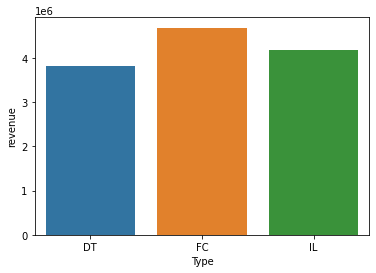

In [20]:
cityPerc=df_train[["Type","revenue"]].groupby(['Type'],as_index=False).mean()
sns.barplot(x='Type', y='revenue',data=cityPerc)

In [21]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


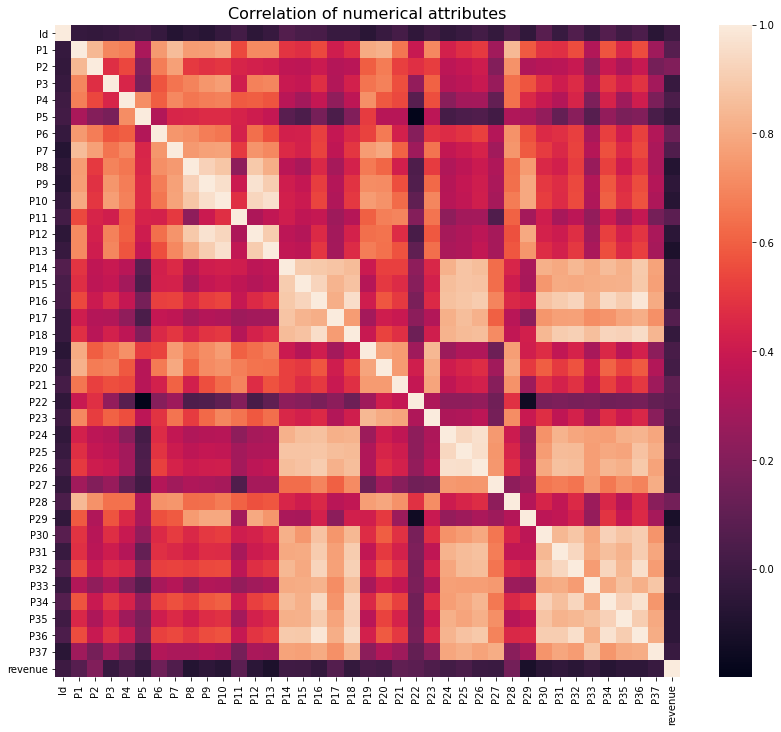

In [22]:
correlation = df_train[num_col].corr()
f, ax=plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes',size=16)
sns.heatmap(correlation)
plt.show()

In [23]:
correlation['revenue'].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

In [24]:
#df_train=df_train.drop('Open Date', axis=1)
#df_train=df_train.drop('Id',axis=1)
#df_train.head(5)

In [25]:
CityGroupDummyTrain=pd.get_dummies(df_train['City Group'])
df_train=df_train.join(CityGroupDummyTrain)
#df_train=df_train.drop('City Group', axis=1)
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,Big Cities,Other
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,1,0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,1,0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,0,1
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,0,1
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,0,1


In [26]:
# Data type conversion
df_train = df_train.astype({"City":'category',"City Group":'category',"Type":'category', "Open Date":'datetime64[ns]'})
# df_train.info()
df_test = df_test.astype({"City":'category',"City Group":'category',"Type":'category', "Open Date":'datetime64[ns]'})
# df_test.info()

In [27]:
# 1. Check categories in train and test data
# df_train : City, City group, Type
cities = df_train.City.unique().tolist()
print(len(cities))
city_group = df_train['City Group'].unique().tolist()
print(city_group)
type_ = df_train['Type'].unique().tolist()
print(type_)

34
['Big Cities', 'Other']
['IL', 'FC', 'DT']


In [28]:
cities = df_test.City.unique().tolist()
print(len(cities))
city_group = df_train['City Group'].unique().tolist()
print(city_group)
type_ = df_train['Type'].unique().tolist()
print(type_)

57
['Big Cities', 'Other']
['IL', 'FC', 'DT']


In [29]:
df_train['City Group'] = df_train[['City Group']].apply(lambda x: x.cat.codes)
df_train['Type'] = df_train[['Type']].apply(lambda x: x.cat.codes)
from sklearn.tree import DecisionTreeRegressor

df_train = df_train.drop(columns = ['Id','Open Date','City'],axis=1)
X = df_train.loc[:, df_train.columns != 'revenue']
y = df_train.loc[:, df_train.columns == 'revenue']

tree = DecisionTreeRegressor().fit(X, y)
# Feature importance dataframe
d = {'Importance': np.round(tree.feature_importances_, 3) , 'Features': X.columns}
feature_imp = pd.DataFrame(data=d)
# Sort
feature_imp_order = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)[0:20]
feature_imp_order

,Importance,Features
0,0.155,P29
1,0.115,P5
2,0.101,P6
3,0.085,P22
4,0.074,P8
5,0.068,P20
6,0.060,P2
7,0.060,P28
8,0.050,P17
9,0.045,P1


In [30]:
# Training
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


X_main = df_train[feature_imp_order.Features.values]
y_main = df_train['revenue']
scaler_train = StandardScaler()
scaler_train.fit(X_main)
X_main_scaled = scaler_train.transform(X_main)

# Splitting the data into training and testing data
linear_regr = LinearRegression()
linear_regr.fit(X_main_scaled, y)
y_pred = linear_regr.predict(X_main_scaled)
accuracy = linear_regr.score(X_main_scaled,y)
print("Train Accuracy {}%".format(int(round(accuracy *100))))
print("Training RMSE Linear regression ",mean_squared_error(y, y_pred, squared=False))

from sklearn.svm import SVR
svm_regr = SVR(kernel = 'rbf')
svm_regr.fit(X_main_scaled, y)
y_pred = svm_regr.predict(X_main_scaled)
accuracy = svm_regr.score(X_main_scaled,y)
print("Train Accuracy {}%".format(int(round(accuracy *100))))
print("Training RMSE SVM regressor ",mean_squared_error(y, y_pred, squared=False))

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dt_regr = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
dt_regr.fit(X_main_scaled, y)
y_pred = dt_regr.predict(X_main_scaled)
print("Train Accuracy {}%".format(int(round(accuracy *100))))
print("Training RMSE SVM regressor ",mean_squared_error(y, y_pred, squared=False))

Train Accuracy 22%
Training RMSE Linear regression  2259646.3444479303
Train Accuracy -4%
Training RMSE SVM regressor  2617560.1117202747
Train Accuracy -4%
Training RMSE SVM regressor  859982.2383735374


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
# Prepare test data
df_test
df_test['City Group'] = df_test[['City Group']].apply(lambda x: x.cat.codes)
df_test['Type'] = df_test[['Type']].apply(lambda x: x.cat.codes)

result_df_linear_regr = pd.DataFrame()
result_df_linear_regr['Id'] = df_test['Id'].values

result_df_svm_regr = pd.DataFrame()
result_df_svm_regr['Id'] = df_test['Id'].values

result_df_dt_regr = pd.DataFrame()
result_df_dt_regr['Id'] = df_test['Id'].values

df_test = df_test[feature_imp_order.Features.values]

X_test = df_test.loc[:, df_test.columns != 'revenue']
# y_test = df_test.loc[:, df_train.columns == 'revenue']

scaler_test = StandardScaler()
scaler_test.fit(X_test)
X_test_scaled = scaler_test.transform(X_test)
y_pred_linear_regr = linear_regr.predict(X_test_scaled)
result_df_linear_regr['Prediction'] = y_pred_linear_regr
result_df_linear_regr['Prediction'] = result_df_linear_regr['Prediction'].apply(lambda x:round(x,2))
result_df_linear_regr

y_pred_svm_regr = svm_regr.predict(X_test_scaled)
result_df_svm_regr['Prediction'] = y_pred_svm_regr
result_df_svm_regr['Prediction'] = result_df_svm_regr['Prediction'].apply(lambda x:round(x,2))
result_df_svm_regr

y_pred_dt_regr = dt_regr.predict(X_test_scaled)
result_df_dt_regr['Prediction'] = y_pred_dt_regr
result_df_dt_regr['Prediction'] = result_df_dt_regr['Prediction'].apply(lambda x:round(x,2))
result_df_dt_regr.to_csv('Prediction_DT.csv',index=False)
result_df_dt_regr

,Id,Prediction
0,0,4250553.0
1,1,5787594.0
2,2,4758476.0
3,3,5787594.0
4,4,5444227.0
...,...,...
99995,99995,6412623.0
99996,99996,2792031.0
99997,99997,2058644.0
99998,99998,4350573.0
